## Exploratory Data Analysis

Dataset description:

1. **id** - a unique identifier for each trip

2. **vendor_id** - a code indicating the provider associated with the trip record

3. **pickup_datetime** - date and time when the meter was engaged

4. **dropoff_datetime** - date and time when the meter was disengaged

5. **passenger_count** - the number of passengers in the vehicle (driver entered value)

6. **pickup_longitude** - the longitude where the meter was engaged

7. **pickup_latitude** - the latitude where the meter was engaged

8. **dropoff_longitude** - the longitude where the meter was disengaged

9. **dropoff_latitude** - the latitude where the meter was disengaged

10. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

11. **trip_duration** - (target) duration of the trip in seconds

Loading libraries

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Loading data

In [2]:
# extracting dataset from the zip file

!unzip "/content/EDA_NYC_Taxi (1).zip" -d "/content/"

Archive:  /content/EDA_NYC_Taxi (1).zip
  inflating: /content/nyc_taxi_trip_duration.csv  


In [50]:
# loading dataset

df = pd.read_csv('/content/nyc_taxi_trip_duration.csv')

Understanding the contents of the dataset

In [21]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [22]:
# printing the first five rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [23]:
# printing the last five rows
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


Missing values

In [24]:
# checking for the missing values

print("No. of missing values in each columns: \n")
print(df.isnull().sum())

No. of missing values in each columns: 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


There are no missing values present in any of the columns

Duplicated records

In [25]:
# checking for the duplicate records
print("No. of duplicate records: ", df.duplicated().sum())

No. of duplicate records:  0


There are no duplicate records present in the dataset

Datatypes of the features

In [26]:
# checking the datatype of all features in the dataset

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**categorical variables:**

id, pickup_datetime, dropoff_datetime, store_and_fwd_flag

**continuous variables:**

vendor_id, passenger_count, pickup_longitude, pickup_latitude dropoff_longitude, dropoff_latitude

**target variable:** trip_duratation

trip_duration is a continuos variable, which determines that the problem is a regression problem.

### understanding categorical variable

Now, we will dive into each variable one by one.

Starting off with id variable, since it is unique for every record, this feature is not important for the model.

feature - pickup_datetime, dropoff_datetime

In [16]:
# checking the datatype of the datetime feature
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     object
dropoff_datetime    object
dtype: object


The datetime features have a datatype of string object and to extract features from these datetime variables, we need to first convert them into datetime datatype.

In [51]:
# converting strings to datetime features

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [18]:
# checking the datatype again

print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object


feature - store_and_fwd_flag

In [27]:
# checking the value count
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

This variable contains Yes and No values only. This can be converted to numeric datatype using the label encoder

The LabelEncoder() from sklearn.preprocessing will map N to 0 and Y to 1.

### exploring the target variable

In [30]:
# trip duration in hour
df['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

The maximum trip duration is of 538 hours which seems to be an outlier. To help the model make more accurate prediction, we need to log transform this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


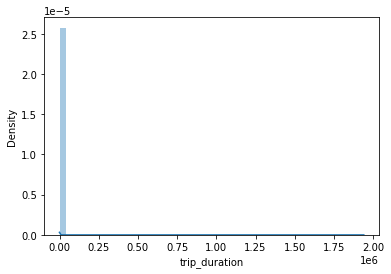

In [42]:
# before log transform
sns.distplot(df['trip_duration'])
plt.show()

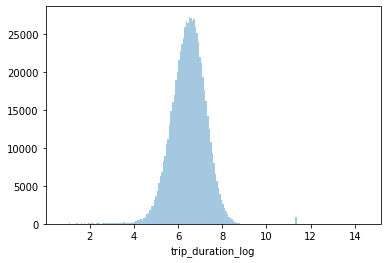

In [52]:
# after log transform

df['trip_duration_log'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['trip_duration_log'], kde = False, bins = 200)
plt.show()

### Univariate analysis

Text(0, 0.5, 'Frequency')

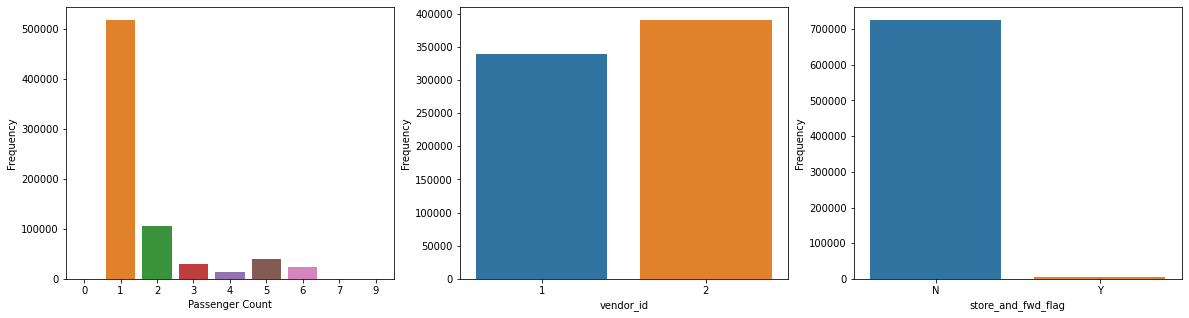

In [46]:
# Binary Features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

Inferences:

1. Most trips consists rides with 1 passenger only.
2. Vendor 2 has more trips, compared to vendor 1
3. The value with Y is very low in the store_and_fwd_flag variable. This suggests that almost no storing took place

Checking the trip duration as per datetime feature

In [54]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


The trip duration data is collected from the time period of first 6 months from the year 2016

Text(0, 0.5, 'Total number of pickups')

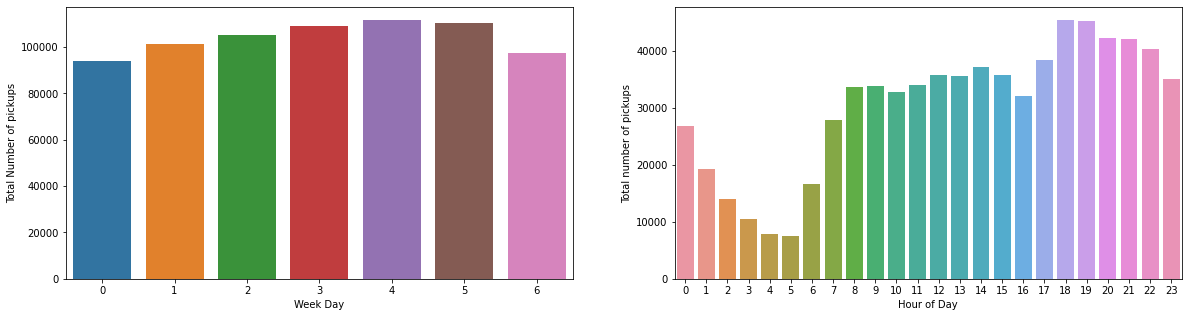

In [55]:
# extracting more features from the datetime variable

df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour


# Datetime features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(121)
sns.countplot(df['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sns.countplot(df['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

Inferences:
1. Weekdays have high trips compare to Saturday(6) and Sunday(0).

2. Trip is on peak on Thursday(4).

3. Trips are very low in early morning, while very high in the late evening hour in the day.

### correlation heatmap

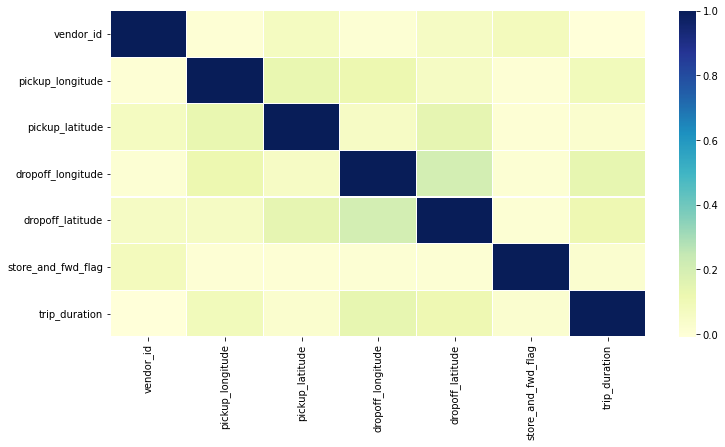

In [53]:
# checking the correlation among all features

plt.figure(figsize=(12, 6))
df1 = df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count','trip_duration_log'],
        axis=1)
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")